# Test Dataloader in dataset.py

In [32]:
# install packages
import yaml
import os
import json
import torch
from torch.utils.data import Dataset
from torch import randint
from torchmetrics.functional.segmentation import mean_iou
from torchvision.transforms import Compose, Resize, ToTensor
from PIL import Image
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask
from pycocotools.coco import COCO
import numpy as np
from sharkbody_seg.dataset import SharkBody



Import Data/Annotations

In [15]:
config_file_path = '/home/Alexandra/Projects/bodycondition/sharkbody_seg/runs/unet_smp/split_individual_flight/config/config.yaml' # config file path
with open(config_file_path, 'r') as file: cfg = yaml.safe_load(file) # load yaml as cfg

Functions from earth_obs_seg (Bjorn)

# Test each function

In [16]:
# instantiate shark body
dataset = SharkBody(cfg, split='val')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [9]:
# test data loader
for i in range(5):
    print(dataset[i])  # Should print (image_tensor, label)

{'image': tensor([[[0.3529, 0.3529, 0.3569,  ..., 0.3804, 0.3843, 0.3843],
         [0.3529, 0.3529, 0.3529,  ..., 0.3804, 0.3882, 0.4000],
         [0.3569, 0.3529, 0.3529,  ..., 0.3804, 0.3961, 0.5020],
         ...,
         [0.3490, 0.3490, 0.3412,  ..., 0.3451, 0.3451, 0.3451],
         [0.3490, 0.3490, 0.3451,  ..., 0.3451, 0.3451, 0.3451],
         [0.3490, 0.3490, 0.3451,  ..., 0.3490, 0.3529, 0.3529]],

        [[0.5451, 0.5451, 0.5490,  ..., 0.5725, 0.5725, 0.5765],
         [0.5451, 0.5451, 0.5451,  ..., 0.5725, 0.5804, 0.5843],
         [0.5490, 0.5451, 0.5451,  ..., 0.5725, 0.5843, 0.6392],
         ...,
         [0.5412, 0.5412, 0.5333,  ..., 0.5490, 0.5490, 0.5490],
         [0.5412, 0.5373, 0.5333,  ..., 0.5529, 0.5529, 0.5490],
         [0.5412, 0.5412, 0.5373,  ..., 0.5529, 0.5529, 0.5529]],

        [[0.4627, 0.4627, 0.4627,  ..., 0.4980, 0.5020, 0.5098],
         [0.4627, 0.4588, 0.4588,  ..., 0.4980, 0.5059, 0.5176],
         [0.4627, 0.4588, 0.4588,  ..., 0.4980, 

In [10]:
np.array(img).shape

NameError: name 'img' is not defined

In [11]:
# test len function
print(len(dataset)) 

172


In [12]:
# test the __getitem__ function
sample = dataset[0]
img_tensor = sample['image']  
mask_tensor = sample['mask'] 

sample

{'image': tensor([[[0.3529, 0.3529, 0.3569,  ..., 0.3804, 0.3843, 0.3843],
          [0.3529, 0.3529, 0.3529,  ..., 0.3804, 0.3882, 0.4000],
          [0.3569, 0.3529, 0.3529,  ..., 0.3804, 0.3961, 0.5020],
          ...,
          [0.3490, 0.3490, 0.3412,  ..., 0.3451, 0.3451, 0.3451],
          [0.3490, 0.3490, 0.3451,  ..., 0.3451, 0.3451, 0.3451],
          [0.3490, 0.3490, 0.3451,  ..., 0.3490, 0.3529, 0.3529]],
 
         [[0.5451, 0.5451, 0.5490,  ..., 0.5725, 0.5725, 0.5765],
          [0.5451, 0.5451, 0.5451,  ..., 0.5725, 0.5804, 0.5843],
          [0.5490, 0.5451, 0.5451,  ..., 0.5725, 0.5843, 0.6392],
          ...,
          [0.5412, 0.5412, 0.5333,  ..., 0.5490, 0.5490, 0.5490],
          [0.5412, 0.5373, 0.5333,  ..., 0.5529, 0.5529, 0.5490],
          [0.5412, 0.5412, 0.5373,  ..., 0.5529, 0.5529, 0.5529]],
 
         [[0.4627, 0.4627, 0.4627,  ..., 0.4980, 0.5020, 0.5098],
          [0.4627, 0.4588, 0.4588,  ..., 0.4980, 0.5059, 0.5176],
          [0.4627, 0.4588, 0.45

In [47]:
sample["mask"].dtype

torch.float32

In [17]:
sample['image'].dim()

3

In [18]:
# check dimensions of tensors

print(f"Image dimensions: {img_tensor.shape if hasattr(img_tensor, 'shape') else img_tensor.size()}") 

# Check the dimensions of the mask
print(f"Mask dimensions: {mask_tensor.shape if hasattr(mask_tensor, 'shape') else mask_tensor.size()}")  


Image dimensions: torch.Size([3, 224, 224])
Mask dimensions: torch.Size([1, 224, 224])


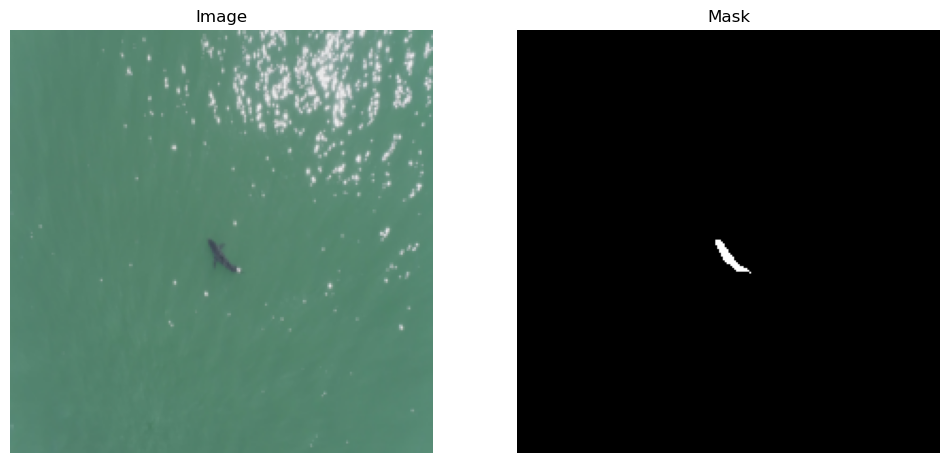

In [19]:
# check plots 

img_display = img_tensor.numpy().transpose(1, 2, 0)  # Convert to (H, W, C)
mask_display = mask_tensor.squeeze(0).numpy()  # Convert from (1, H, W) to (H, W)

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # two subplots

# image plot
axes[0].imshow(img_display)
axes[0].set_title("Image")
axes[0].axis('off') 

# mask plot
axes[1].imshow(mask_display, cmap='gray')  # Use 'gray' colormap for mask
axes[1].set_title("Mask")
axes[1].axis('off') 

plt.show()


In [1]:
# load model 
'Projects/bodycondition/sharkbody_seg/runs/unet_smp/demo_run/checkpoint/checkpoint_epoch100.pth'

# model.predict(preprocessed img)

NameError: name 'sample' is not defined

IOU Testing

In [46]:
background_mask = torch.zeros_like(mask_tensor)
foreground_mask = torch.ones_like(mask_tensor)

torch.unique(background_mask)

tensor([0.])

In [48]:
#preds = (mask_tensor > 0).to(torch.long)
preds = background_mask.to(torch.long)

#target = (mask_tensor > 0).to(torch.long)
#target = background_mask.to(torch.long)
target = foreground_mask.to(torch.long)

iou = mean_iou(preds, target, num_classes = 2, input_format = "index")
print(iou)

tensor([0.])
